In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the data
file_path = r'C:\Users\aiburale\DataspellProjects\Boba Shop Raw Data.xlsx'
data = pd.read_excel(file_path, sheet_name='raw')


In [5]:

# Data Cleaning
data.dropna(subset=['user_id'], inplace=True)

In [6]:

# Safe datetime parsing
def safe_parse_datetime(time_str):
    try:
        return pd.to_datetime(time_str, format='%d %I:%M:%S %p', errors='coerce')
    except Exception as e:
        print(f"Error parsing {time_str}: {str(e)}")
        return pd.NaT

data['placed order time (UTC)'] = data['placed order time (UTC)'].apply(safe_parse_datetime)

In [7]:
# Analysis Functions
def analyze_store_performance(data):
    return data.groupby(['store city', 'store id']).agg(
        total_orders=('user_id', 'count'),
        total_revenue=('order total', 'sum'),
        average_rating=('rating', 'mean'),
        total_refunds=('refund total', 'sum')
    ).sort_values(by='total_revenue', ascending=False)

def order_frequency_analysis(data):
    data['hour'] = data['placed order time (UTC)'].dt.hour
    return data.groupby('hour').size()

def average_order_size_analysis(data):
    return data['order size'].mean()

In [8]:
# Visualizations for Business Opportunities
def visualize_customer_distribution_by_order_size(data):
    bins = [0, 1, 2, 3, 4, 5, 10]  # Define bins for order size categories
    labels = ['1', '2', '3', '4', '5', '5+']
    data['order_size_category'] = pd.cut(data['order size'], bins=bins, labels=labels, right=False)
    order_size_distribution = data['order_size_category'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    order_size_distribution.plot(kind='bar')
    plt.title('Customer Distribution by Order Size')
    plt.xlabel('Order Size')
    plt.ylabel('Number of Orders')
    plt.show()

def visualize_order_volume_by_time(data):
    plt.figure(figsize=(10, 6))
    order_frequency = data.groupby(data['placed order time (UTC)'].dt.hour).size()
    order_frequency.plot(kind='bar')
    plt.title('Order Volume by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Orders')
    plt.show()
	

In [9]:
# Running Analyses
store_performance = analyze_store_performance(data)
average_order_size = average_order_size_analysis(data)

Store Performance:
                     total_orders  total_revenue  average_rating  \
store city store id                                                
city A     acjde              358   15862.860000        3.159218   
city C     wehqk              354   15853.848571        3.737288   
city B     bjdwe              337   15826.702857        3.643917   

                     total_refunds  
store city store id                 
city A     acjde             401.0  
city C     wehqk             394.0  
city B     bjdwe             398.0  

Average Order Size: 5.517635843660629


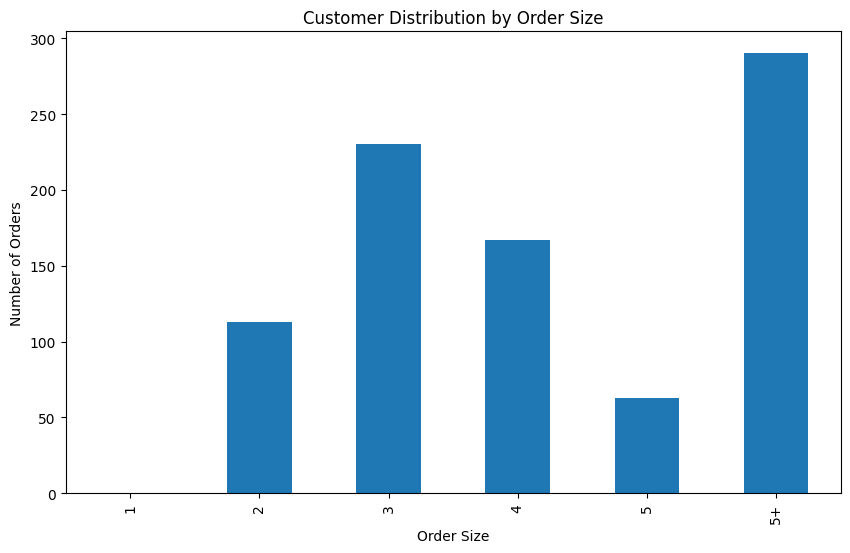

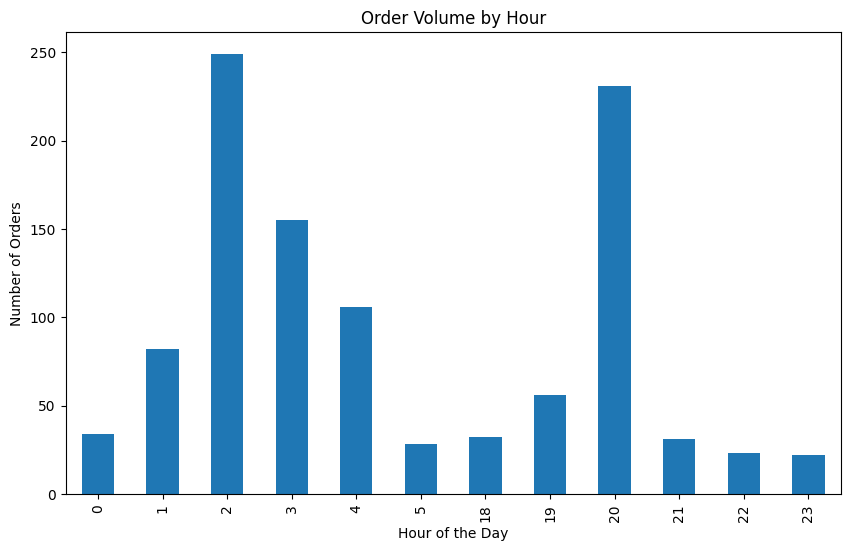

In [10]:
# Display and visualize results
print("Store Performance:")
print(store_performance)
print("\nAverage Order Size:", average_order_size)

visualize_customer_distribution_by_order_size(data)
visualize_order_volume_by_time(data)

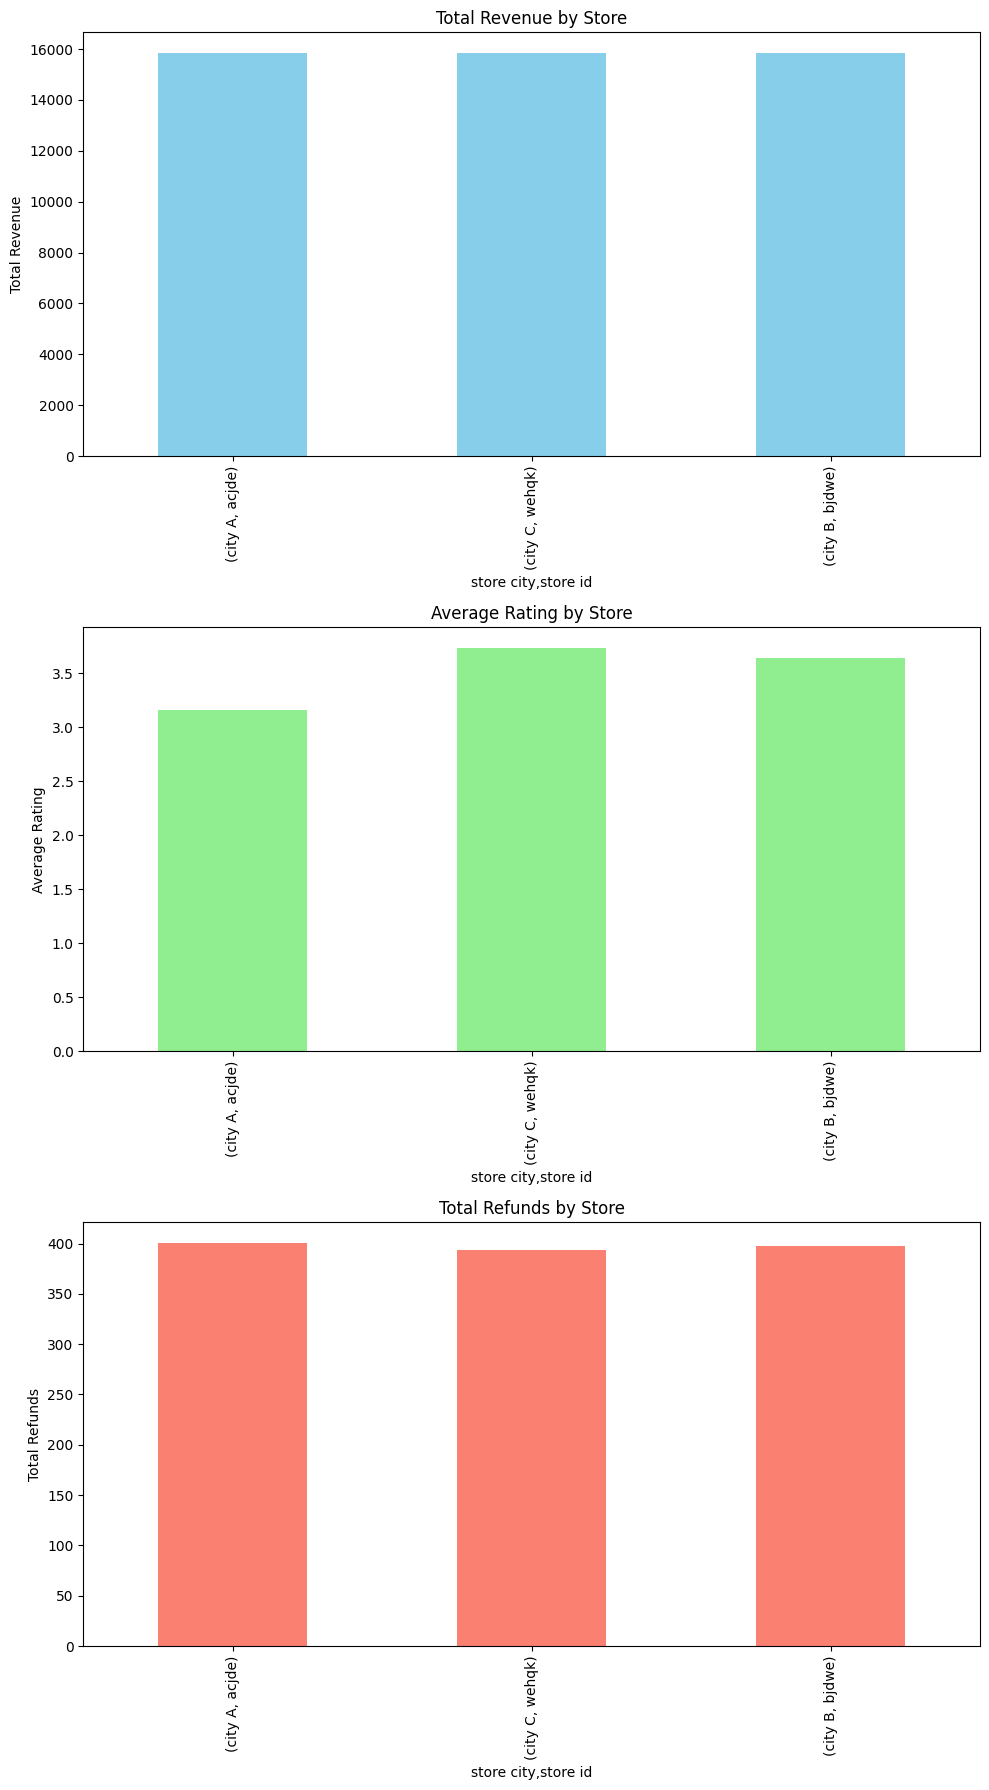

In [11]:
# Plot Store Performance Metrics
fig, axes = plt.subplots(3, 1, figsize=(10, 18))
store_performance['total_revenue'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Revenue by Store')
axes[0].set_ylabel('Total Revenue')

store_performance['average_rating'].plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Average Rating by Store')
axes[1].set_ylabel('Average Rating')

store_performance['total_refunds'].plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Total Refunds by Store')
axes[2].set_ylabel('Total Refunds')

plt.tight_layout()
plt.show()